In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()

In [118]:
df = pd.read_csv("D:\data science\python project\playstore-analysis (2) (1).csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [119]:
# Study dataset check column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 635.3+ KB


In [120]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data Cleaning – Missing value treatment

In [121]:
#Finding the missing value

print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [122]:
# a. Drop records where rating is missing since rating is our target/study variable


In [123]:
df.dropna(subset=['Rating'],axis =0, inplace= True)

In [124]:
print("Missing Values :\n{df.isnull().sum()}")

Missing Values :
{df.isnull().sum()}


In [125]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [126]:
df.Rating.isnull().sum()

0

In [127]:
# b. Check the null values for the Android Ver column.

In [128]:
print("Missing Values :\n {df['Android Ver'].isnull().sum()}")

Missing Values :
 {df['Android Ver'].isnull().sum()}


In [129]:
df['Android Ver'].isnull().sum()

3

In [130]:
# i. Are all 3 records having the same problem?

In [131]:
print(df[df.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [132]:
# we will drop 10472 column
# Drop the 3rd record i.e. record for “Life Made WIFI …”

In [133]:
df = df.drop(10472)

In [134]:
# Verification
verify = df[df["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [135]:
# iii. Replace remaining missing values with the mode

In [136]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [137]:
# check wheather all requirements are fulfilled or not
print("Check wheather android version contains null or not : ",df['Android Ver'].isnull().sum())

Check wheather android version contains null or not :  0


In [138]:
# c. Current ver – replace with most common value
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [139]:
# check wheather all requirements are fulfilled or not
print("Check wheather current version contains null or not : ",df['Current Ver'].isnull().sum())

Check wheather current version contains null or not :  0


In [140]:
# Now check wheather our data contains any missing value
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up – correcting the data types

In [141]:
df['Reviews'] = df['Reviews'].astype(int)
df['Size'] =df['Size'].astype(int)

In [142]:
# Last updated column to date type

In [143]:
df['Last Updated'] = df['Last Updated'].astype('datetime64[ns]')
df['Last Updated'].dtype

dtype('<M8[ns]')

In [144]:
# b. Price variable – remove $ sign and convert to float

In [145]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(str).astype(float)

In [146]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 658.5+ KB


In [148]:
# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [149]:
df['Installs'] = df['Installs'].str.replace(",",'')

In [150]:
df['Installs'] = df['Installs'].str.replace("+",'')

In [151]:
df['Installs'] = df['Installs'].astype(str).astype(int)

In [152]:
df['Installs'].dtype

dtype('int32')

In [153]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 658.5+ KB


# 3. Sanity checks – check for the following and handle accordingly

In [155]:
# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store

In [156]:
array = pd.unique(df['Rating'].values)
array
# No value id greter than 5 or less than 1
# i. Are there any such records? Drop if so.

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [157]:
#b. Reviews should not be more than installs as only those who installed can review the app.

In [158]:
x = df[df.Reviews > df.Installs]
print(x)
# i. Are there any such records? Drop if so.
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)
print(df.loc[df['Reviews'] > df['Installs']])

                                 App   Category  Rating  Reviews   Size  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4  25000   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249  21516   
5917                        Ra Ga Ba       GAME     5.0        2  20000   
6700                Brick Breaker BR       GAME     5.0        7  19000   
7402            Trovami se ci riesci       GAME     5.0       11   6100   
8591                         DN Blog     SOCIAL     5.0       20   4200   
10697                        Mu.F.O.       GAME     5.0        2  16000   

       Installs  Type  Price Content Rating     Genres Last Updated  \
2454          1  Free   0.00       Everyone    Medical   2018-08-02   
4663      10000  Paid   2.49       Everyone  Lifestyle   2018-07-30   
5917          1  Paid   1.49       Everyone     Arcade   2017-02-08   
6700          5  Free   0.00       Everyone     Arcade   2018-07-23   
7402         10  Free   0.00       Everyone 

In [159]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [160]:
df.shape

(9359, 13)

# 4. Identify and handle outliers

In [161]:
# a. Price column
#     i. Make suitable plot to identify outliers in price

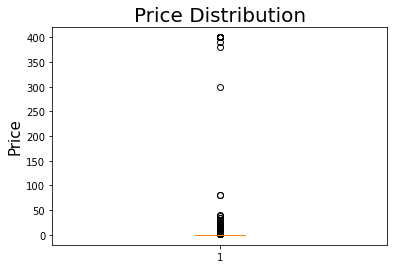

In [162]:
plt.boxplot(df['Price'])
plt.ylabel('Price',fontsize=15)
plt.title('Price Distribution',fontsize=20)
plt.show()


In [163]:
# ii. Do you expect apps on the play store to cost $200? Check out these cases

result = df[df['Price'] == 200]
print("Yes we expect apps on the play store to cost $200 here is our result : \n ",result)

Yes we expect apps on the play store to cost $200 here is our result : 
  Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [164]:
# iii. After dropping the useless records, make the suitable plot again to identify outliers

In [165]:
# To fullfill above condition let's remove whose price value is 0.

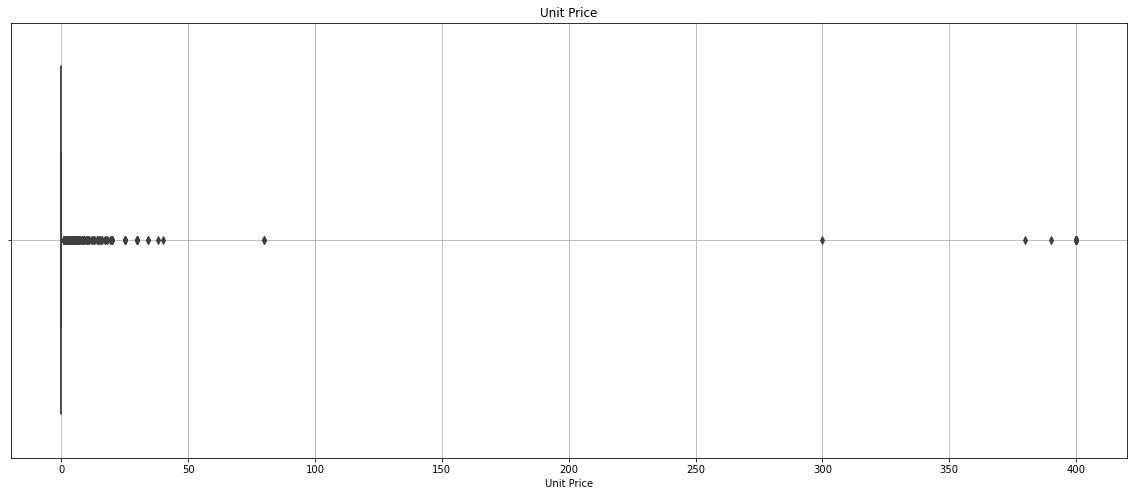

In [166]:
df[df['Price'] != 0]
plt.subplots(figsize=(20,8))
sns.boxplot(df.Price)
plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [167]:
# iv. Limit data to records with price < $30

In [168]:
limit_df = df[df['Price'] < 30]
limit_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [169]:
limit_df.shape

(9338, 13)

In [170]:
limit_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [171]:
#b. Reviews column
    #i)Make suitable plot

['ART_AND_DESIGN' 'ART_AND_DESIGN' 'ART_AND_DESIGN' ... 'FAMILY'
 'BOOKS_AND_REFERENCE' 'LIFESTYLE']
Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AN

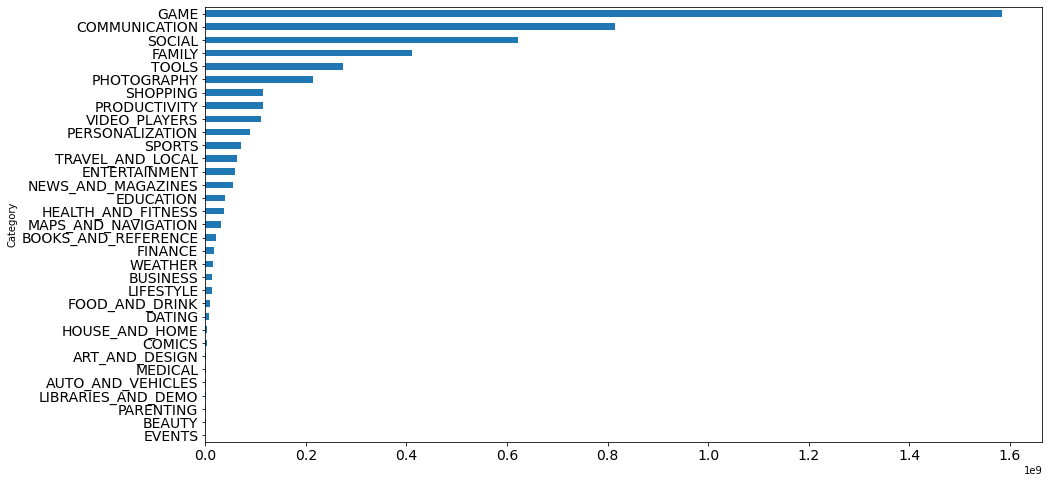

In [172]:
print(df['Category'].values)
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

In [173]:
#ii.)Limit data to apps with < 1 Million reviews

In [174]:
limit_df_by_review = df[df['Reviews'] < 1000000]
limit_df_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [175]:
limit_data_by_review.head(5)

NameError: name 'limit_data_by_review' is not defined

In [ ]:
limit_df_by_review.shape

In [ ]:
# c. Installs
#  i . Drop records having a value more than the 95th percentile.

In [ ]:
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

In [176]:
#ii.) Drop records having a value more than the 95th percentile

In [177]:
# Verification
x = df.Installs.quantile() > val
print (x)

False


# Data analysis to answer business questions

In [178]:
#5) What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

In [179]:
#a. How do you explain this?

Mean of Rating is 4.191174270755429 and Median is 4.3
We can see median is more than mean, hence it is Left Skewed Distribution


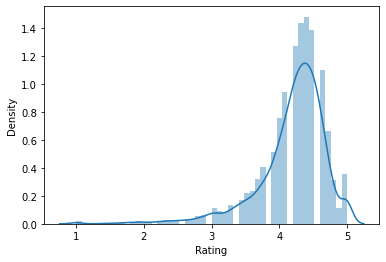

In [180]:
sns.distplot(df['Rating'])
print("Mean of Rating is {} and Median is {}".format(df.Rating.mean(),df.Rating.median()) ) 
print("We can see median is more than mean, hence it is Left Skewed Distribution")
plt.show()

In [181]:
#b). What is the implication of this on your analysis?

In [182]:
#6.) What are the top Content Rating values?

In [183]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [184]:
#6a.) Are there any values with very few records?

In [185]:
#6b.) If yes, drop those as they won’t help in the analysis?

In [186]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+']
Content Rating
Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64


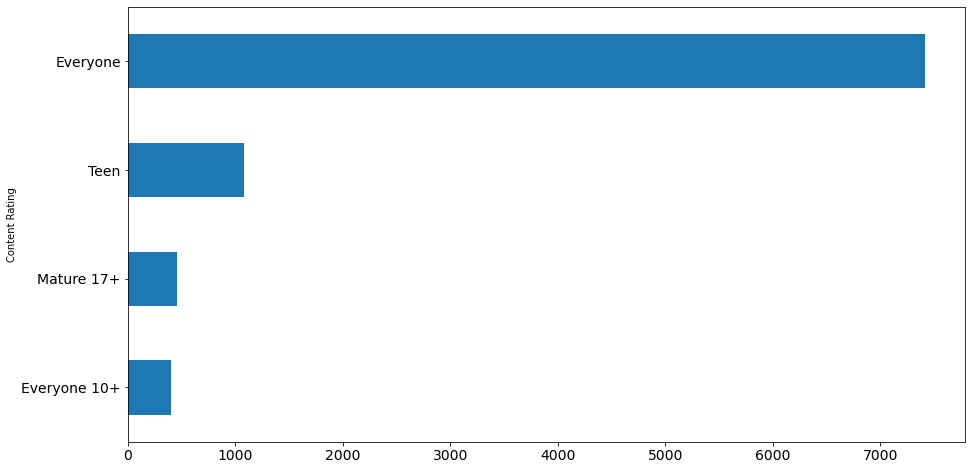

In [187]:
print(df['Content Rating'].unique())
total=df.groupby('Content Rating')['Content Rating'].count().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

In [188]:
#7.)Effect of size on rating

In [189]:
#7a.)Make a joinplot to understand the effect of size on rating.

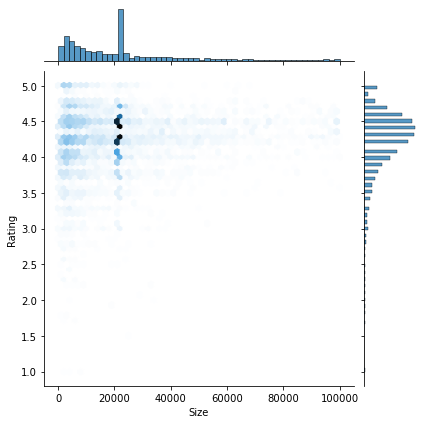

In [190]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()

In [191]:
#7b.)Do you see any patterns?

In [192]:
#7c. How do you explain the pattern?

In [193]:
#8.)Effect of price on rating

In [194]:
#8a.) Make a jointplot (with regression line)

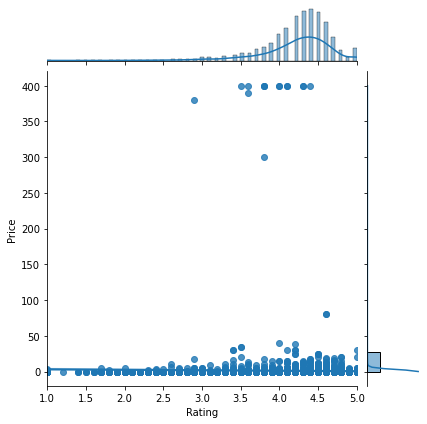

In [195]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df, kind ="reg")
plt.show()

In [196]:
#8b. What pattern do you see?
#8c. How do you explain the pattern?

In [197]:
#8d. Replot the data, this time with only records with price > 0

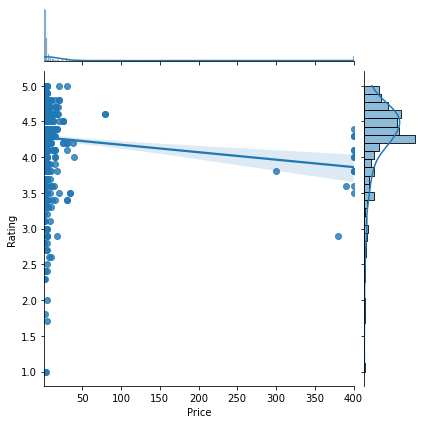

In [198]:
Price_greater_than_zero = df[df['Price'] > 0]
sns.jointplot(y ="Rating" , x = "Price" ,data = Price_greater_than_zero, kind = "reg" )
plt.show()

In [200]:
# 8e. Does the pattern change?
# 8f. What is your overall inference on the effect of price on the rating

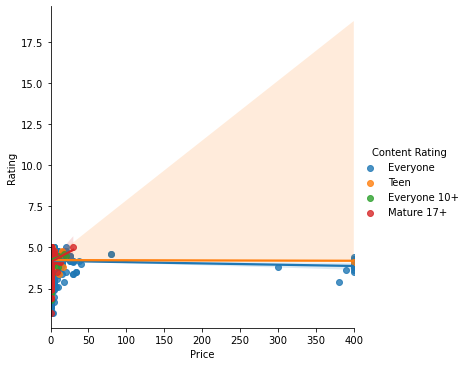

In [201]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating',data=df)
plt.show()

In [202]:
# 9. Look at all the numeric interactions together –
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

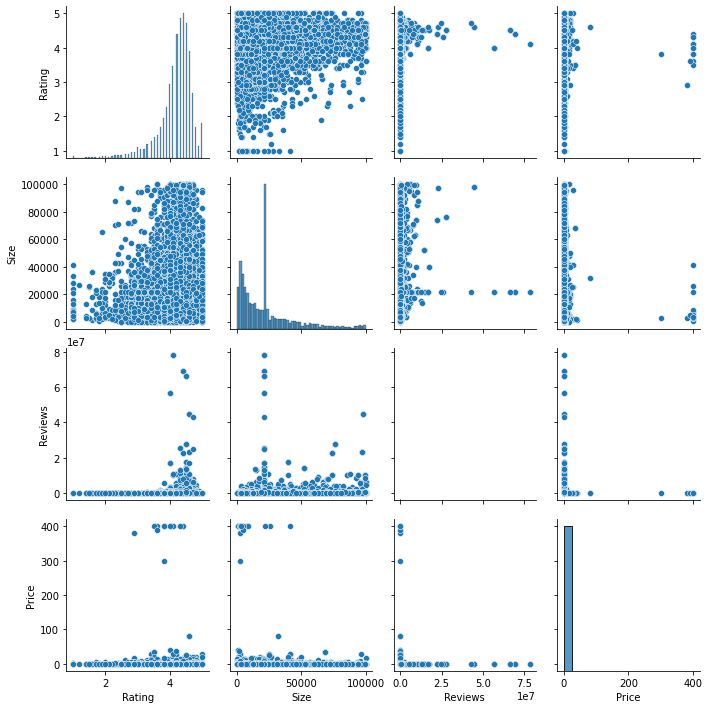

In [203]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

In [204]:
# This is the basic exploratory analysis to look for any patterns or relationships between the features.

In [205]:
# 10. Rating vs. content rating
# 10a. Make a bar plot displaying the rating for each content rating

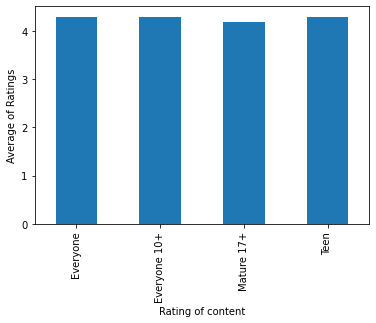

In [210]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

In [212]:
# b. Which metric would you use? Mean? Median? Some other quantile?
# c. Choose the right metric and plot

# I used median , we will plot using count

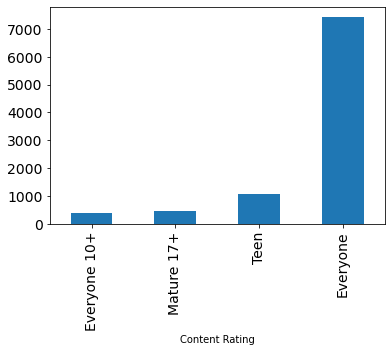

In [214]:
total = df.groupby('Content Rating')['Rating'].count().sort_values()
total.plot(kind='bar',fontsize=14)
plt.show()

In [215]:
# # 11. Content rating vs. size vs. rating – 3 variables at a time
# a. Create 5 buckets (20% records in each) based on Size

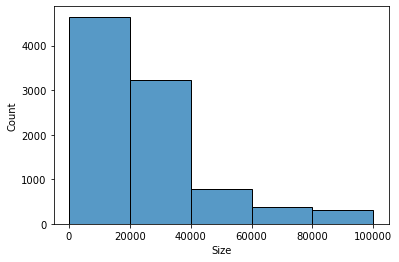

In [216]:
#Checking skewness
sns.histplot(df['Size'],bins=5)
plt.show()

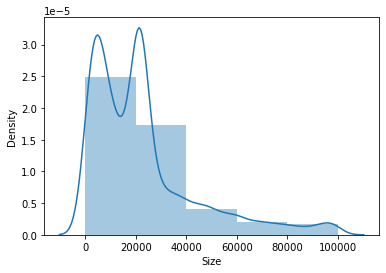

In [217]:
sns.distplot(df["Size"], bins=5)
plt.show()

In [218]:
bins=[0, 5000, 15000, 23000, 64000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.111256,4.189474,4.112281,4.200000
LOW,4.174755,4.263636,4.063551,4.198429
MED,4.247746,4.245455,4.100714,4.227697
HIGH,4.182181,4.202963,4.174590,4.246057
VERY HIGH,4.270752,4.382051,4.237143,4.292857


In [219]:
#11b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [220]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [221]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [222]:
#11c. Make a heatmap of this

In [223]:
#i. Annotated
#ii. Greens color map

In [224]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating',
                             aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.86,3.42,3.8
LOW,3.9,4.10,3.62,3.9
MED,4.0,4.10,3.98,4.0
HIGH,3.9,4.00,3.90,4.0
VERY HIGH,4.1,4.30,4.00,4.1


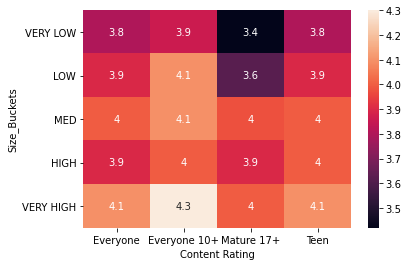

In [225]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

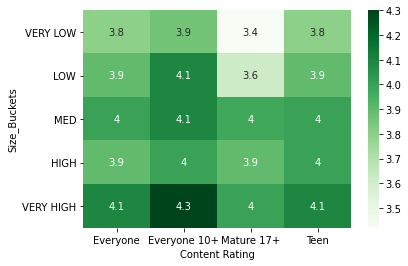

In [226]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

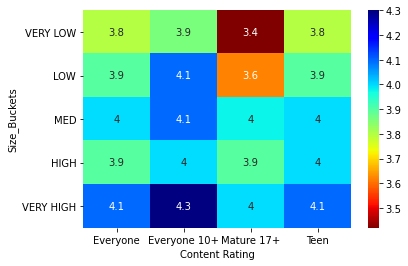

In [233]:
sns.heatmap(Size_Buckets,annot=True,cmap='jet_r')
plt.show()

In [234]:
#11d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it. 
Except, Mature 17+ where low size apps aren't preferred to a greater variation.